In [1]:
import itertools
import pickle

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from pgmpy.models import BayesianNetwork, MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

In [2]:
with open("../models/bayesian_18countries_learnt_bn_treesearch.pickle", "rb") as handle:
    struct = pickle.load(handle)

In [3]:
mm_pgmpy = struct.to_markov_model()

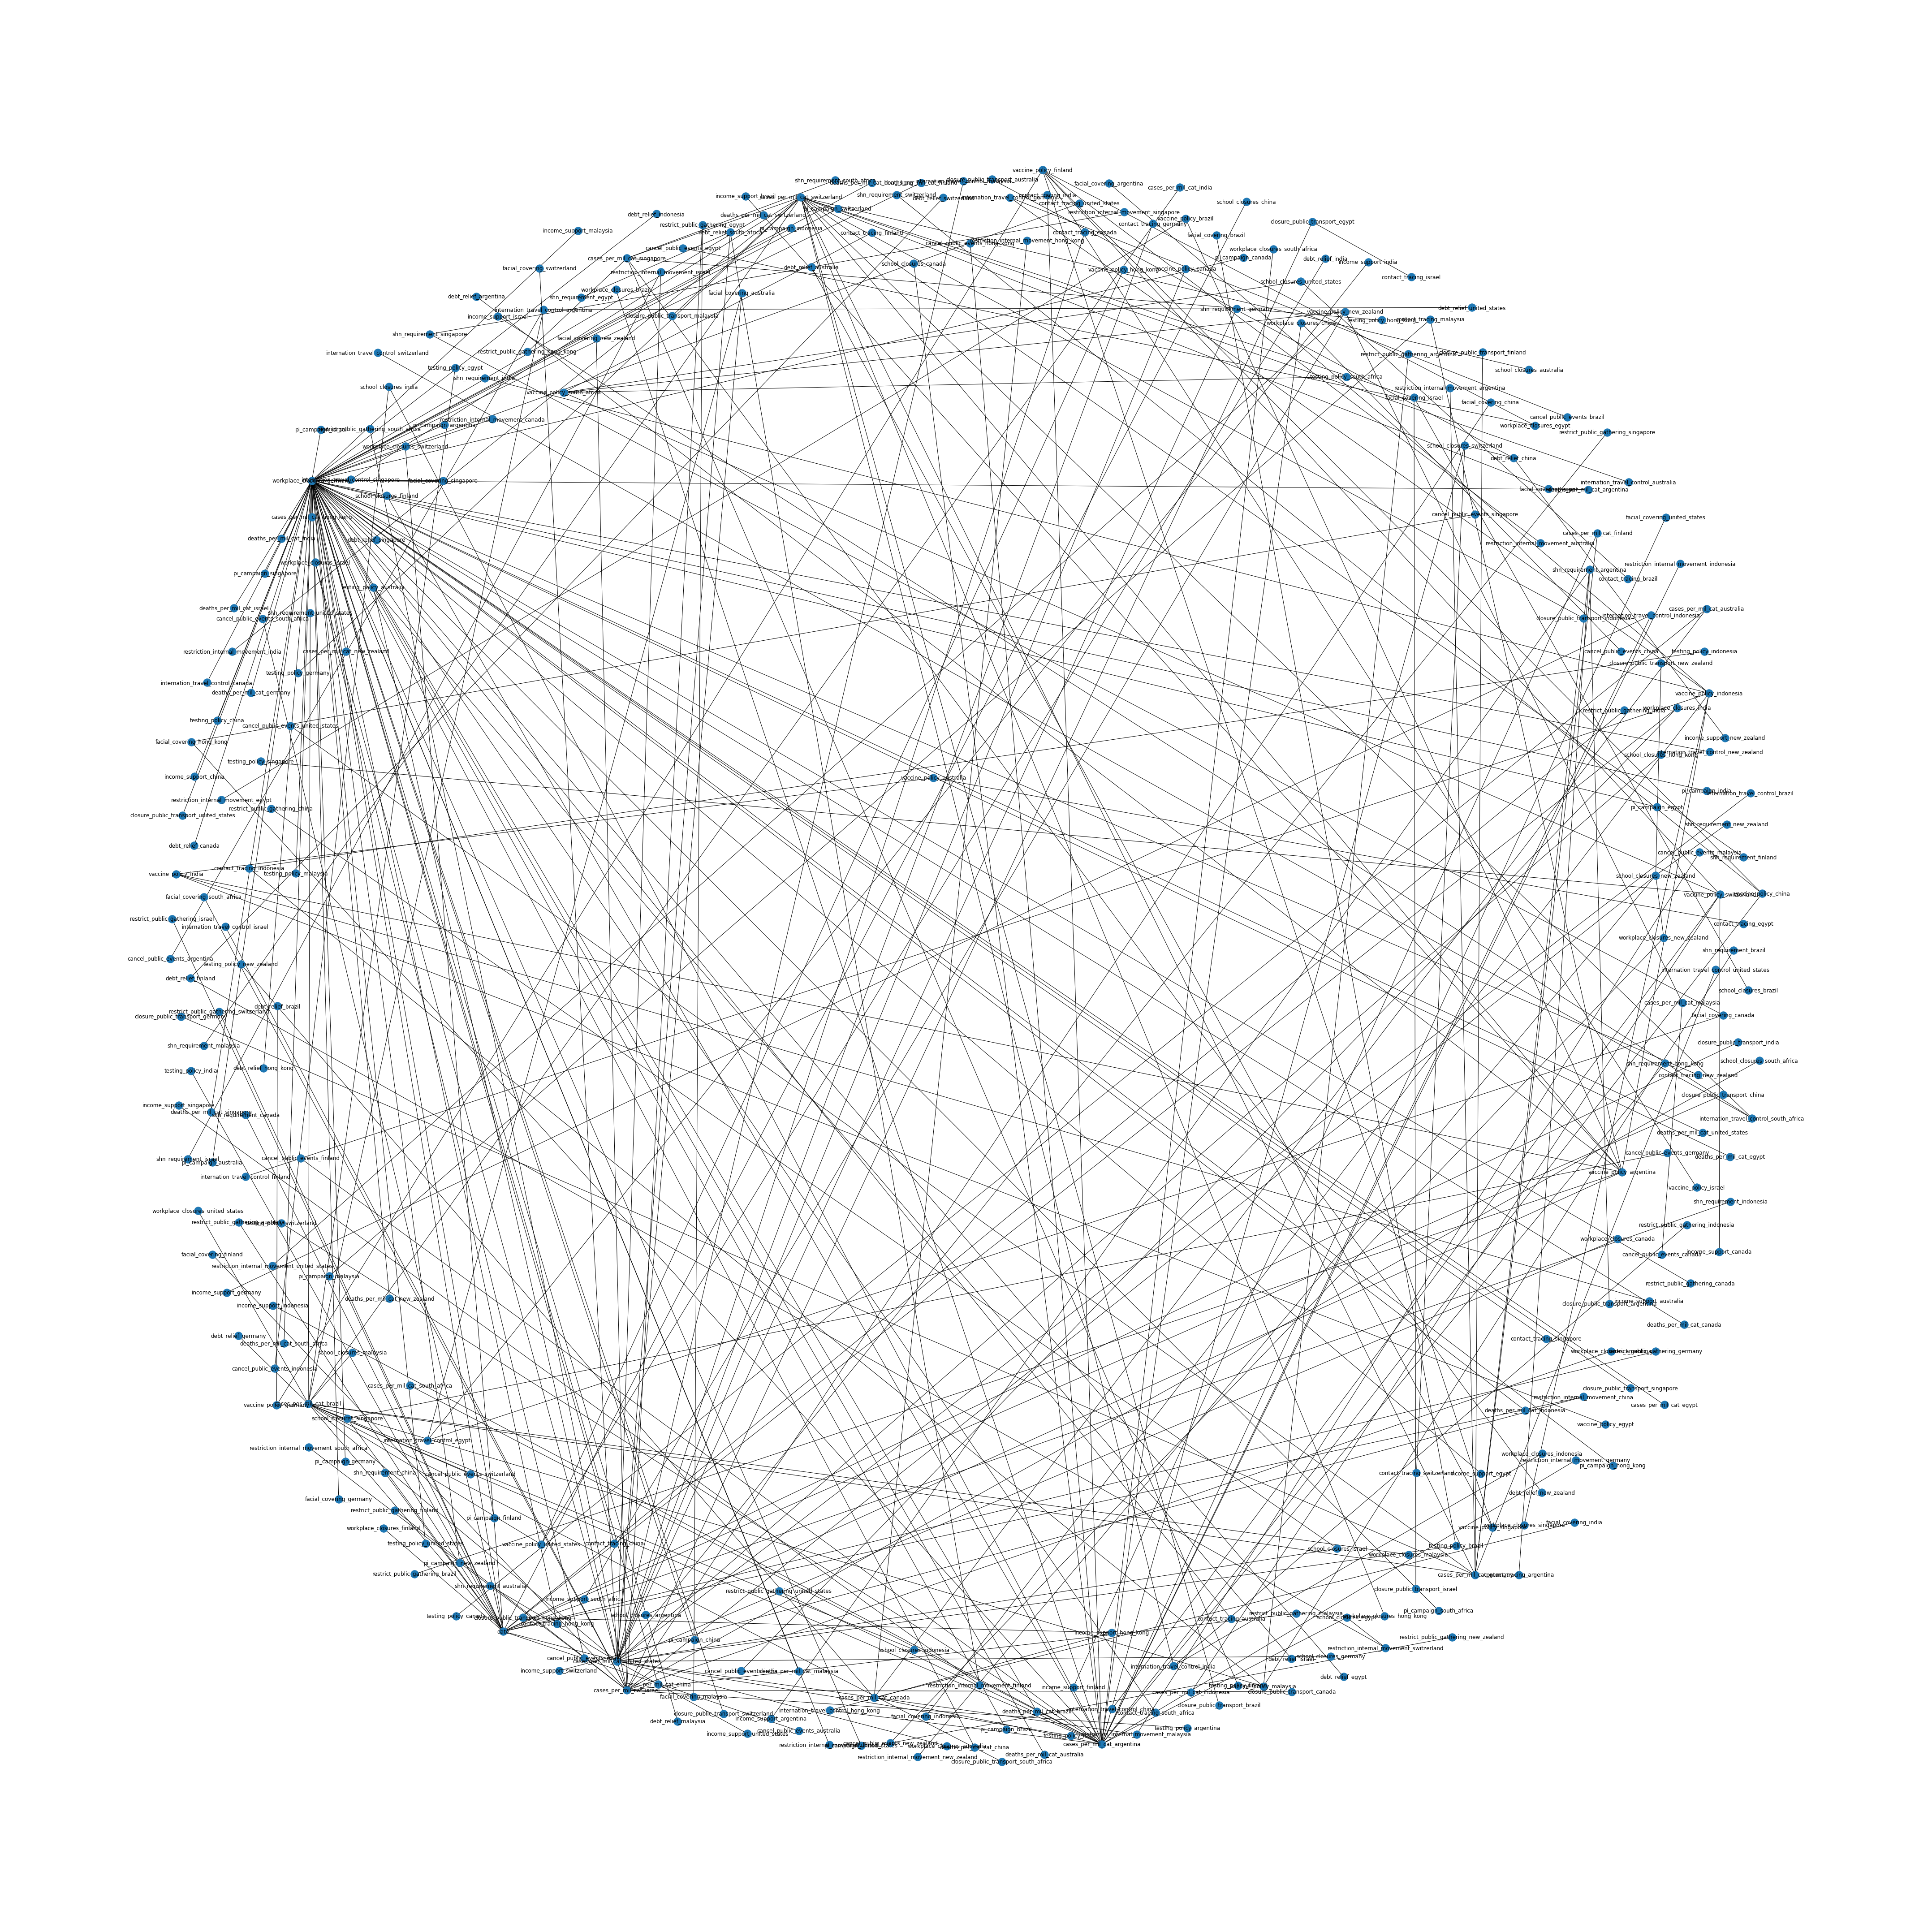

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(60, 60))
nx.draw(mm_pgmpy, with_labels=True, ax=ax)
plt.tight_layout()

In [5]:
train_df = pd.read_csv("../data/processed/train_18_countries.csv")
print(train_df.shape)
train_df.head()

(495, 307)


deaths_per_mil_cat_india  facial_covering_new_zealand  \
0                         0                            3   
1                         0                            2   
2                         0                            3   
3                         0                            3   
4                         0                            2   

   cancel_public_events_argentina  debt_relief_india  \
0                               2                1.0   
1                               2                0.0   
2                               1                1.0   
3                               2                1.0   
4                               2                0.0   

   income_support_singapore  school_closures_argentina  vaccine_policy_china  \
0                         2                          1                     5   
1                         2                          3                     4   
2                         2                          0                     5   
3                         2                          1                     5   
4                         2                          1                     4   

   restriction_internal_movement_indonesia  workplace_closures_finland  \
0                                        2                           1   
1                                        2                           2   
2                                        2                           1   
3                                        2                           1   
4                                        2                           2   

   internation_travel_control_finland  ...  cases_per_mil_cat_finland  \
0                                 2.0  ...                          1   
1                                 3.0  ...                          1   
2                                 2.0  ...                          4   
3                                 2.0  ...                          1   
4                                 3.0  ...                          1   

   cases_per_mil_cat_hong_kong  cases_per_mil_cat_indonesia  \
0                            0                            1   
1                            0                            0   
2                            0                            1   
3                            0                            1   
4                            0                            0   

   cases_per_mil_cat_india  cases_per_mil_cat_israel  \
0                        1                         5   
1                        1                         4   
2                        1                         6   
3                        1                         5   
4                        0                         4   

   cases_per_mil_cat_malaysia  cases_per_mil_cat_new_zealand  \
0                           3                              0   
1                           1                              0   
2                           4                              0   
3                           3                              0   
4                           1                              0   

   cases_per_mil_cat_singapore  cases_per_mil_cat_united_states  \
0                            1                                6   
1                            1                                4   
2                            3                                6   
3                            1                                5   
4                            1                                4   

   cases_per_mil_cat_south_africa  
0                               2  
1                               1  
2                               3  
3                               2  
4                               1  

[5 rows x 307 columns]

In [6]:
test_df = pd.read_csv("../data/processed/test_18_countries.csv")
print(test_df.shape)
test_df.head()

(165, 307)


deaths_per_mil_cat_india  facial_covering_new_zealand  \
0                         0                            3   
1                         0                            3   
2                         0                            2   
3                         0                            3   
4                         0                            0   

   cancel_public_events_argentina  debt_relief_india  \
0                               1                1.0   
1                               2                1.0   
2                               2                2.0   
3                               2                1.0   
4                               2                2.0   

   income_support_singapore  school_closures_argentina  vaccine_policy_china  \
0                         2                          0                     5   
1                         2                          1                     5   
2                         2                          3                     0   
3                         2                          1                     5   
4                         2                          3                     0   

   restriction_internal_movement_indonesia  workplace_closures_finland  \
0                                        2                           1   
1                                        2                           1   
2                                        2                           1   
3                                        2                           1   
4                                        1                           1   

   internation_travel_control_finland  ...  cases_per_mil_cat_finland  \
0                                 2.0  ...                          4   
1                                 2.0  ...                          1   
2                                 3.0  ...                          0   
3                                 2.0  ...                          1   
4                                 3.0  ...                          0   

   cases_per_mil_cat_hong_kong  cases_per_mil_cat_indonesia  \
0                            0                            1   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            0                            0   

   cases_per_mil_cat_india  cases_per_mil_cat_israel  \
0                        1                         6   
1                        1                         6   
2                        0                         1   
3                        1                         5   
4                        0                         0   

   cases_per_mil_cat_malaysia  cases_per_mil_cat_new_zealand  \
0                           4                              0   
1                           3                              0   
2                           0                              0   
3                           3                              0   
4                           0                              0   

   cases_per_mil_cat_singapore  cases_per_mil_cat_united_states  \
0                            3                                6   
1                            1                                6   
2                            1                                1   
3                            1                                5   
4                            0                                1   

   cases_per_mil_cat_south_africa  
0                               3  
1                               2  
2                               1  
3                               2  
4                               0  

[5 rows x 307 columns]

In [7]:
covid_policies_df = pd.read_csv(
    "../data/processed/Final_Data_Combined.csv", index_col=0
)
print(covid_policies_df.shape)
covid_policies_df["date"] = pd.to_datetime(covid_policies_df["Date"])
covid_policies_df["Country"] = covid_policies_df["Country"].str.lower()
covid_policies_df["Country"] = covid_policies_df["Country"].str.replace(" ", "_")
covid_policies_df.rename(columns={"Country": "country"}, inplace=True)
covid_policies_df.set_index(["country", "date"], inplace=True)
covid_policies_df.drop(columns=["Date"], inplace=True)
covid_policies_df.rename(
    columns={col: col.lower() for col in covid_policies_df.columns}, inplace=True
)
print(covid_policies_df.shape)

for column in covid_policies_df.columns:
    if pd.api.types.is_numeric_dtype(covid_policies_df[column].dtype):
        continue

    covid_policies_df[column] = (
        covid_policies_df[column].apply(lambda v: v[:1]).astype("int16")
    )


countries = list(covid_policies_df.reset_index()["country"].unique())
countries
country_to_population_map = {  # for 2021
    "argentina": 45.85e6,
    "australia": 25750198,
    "brazil": 212.61e6,
    "canada": 37.74e6,
    "switzerland": 8.66e6,
    "germany": 83900473,
    "egypt": 101.48e6,
    "finland": 5.54e6,
    "india": 1.39e9,
    "united_states": 332915073,
    "new_zealand": 5122600,
    "south_africa": 60e6,
    "hong_kong": 7500000,
    "china": 1448000000,
    "indonesia": 272000000,
    "singapore": 5450000,
    "malaysia": 32000000,
    "israel": 9.45e6,
}


def compute_cases_bin(cases_per_mil):
    computed_bin = None
    if cases_per_mil <= 10000:
        computed_bin = 0
    elif cases_per_mil < 30000:
        computed_bin = 1
    elif cases_per_mil < 50000:
        computed_bin = 2
    elif cases_per_mil < 70000:
        computed_bin = 3
    elif cases_per_mil < 100000:
        computed_bin = 4
    elif cases_per_mil < 120000:
        computed_bin = 5
    else:
        computed_bin = 6

    return computed_bin


covid_policies_df["cases_per_mil"] = covid_policies_df.apply(
    lambda row: (row.confirmed_cases * 1000000)
    / country_to_population_map[row.name[0]],
    axis=1,
)
covid_policies_df["cases_per_mil_cat"] = covid_policies_df["cases_per_mil"].apply(
    compute_cases_bin
)

covid_policies_df["deaths_per_mil"] = covid_policies_df.apply(
    lambda row: (row.confirmed_deathes * 1000000)
    / country_to_population_map[row.name[0]],
    axis=1,
)
covid_policies_df["deaths_per_mil_cat"] = covid_policies_df["deaths_per_mil"].apply(
    compute_cases_bin
)
print(covid_policies_df.shape)
covid_policies_df.head()

(11993, 19)
(11993, 17)
(11993, 21)


school_closures  workplace_closures  \
country   date                                              
argentina 2020-05-02                3                   3   
          2020-05-03                3                   3   
          2020-05-04                3                   3   
          2020-05-05                3                   3   
          2020-05-06                3                   3   

                      cancel_public_events  restrict_public_gathering  \
country   date                                                          
argentina 2020-05-02                     2                          4   
          2020-05-03                     2                          4   
          2020-05-04                     2                          4   
          2020-05-05                     2                          4   
          2020-05-06                     2                          4   

                      closure_public_transport  shn_requirement  \
country   date                                                    
argentina 2020-05-02                         2                2   
          2020-05-03                         2                2   
          2020-05-04                         2                2   
          2020-05-05                         2                2   
          2020-05-06                         2                2   

                      restriction_internal_movement  \
country   date                                        
argentina 2020-05-02                              1   
          2020-05-03                              1   
          2020-05-04                              1   
          2020-05-05                              1   
          2020-05-06                              1   

                      internation_travel_control  pi_campaign  testing_policy  \
country   date                                                                  
argentina 2020-05-02                         4.0            2             1.0   
          2020-05-03                         4.0            2             1.0   
          2020-05-04                         4.0            2             1.0   
          2020-05-05                         4.0            2             1.0   
          2020-05-06                         4.0            2             1.0   

                      ...  facial_covering  vaccine_policy  income_support  \
country   date        ...                                                    
argentina 2020-05-02  ...                3               0               1   
          2020-05-03  ...                3               0               1   
          2020-05-04  ...                3               0               1   
          2020-05-05  ...                3               0               1   
          2020-05-06  ...                3               0               1   

                      debt_relief  confirmed_cases  confirmed_deathes  \
country   date                                                          
argentina 2020-05-02          2.0           4681.0              237.0   
          2020-05-03          2.0           4783.0              246.0   
          2020-05-04          2.0           4887.0              260.0   
          2020-05-05          2.0           5020.0              264.0   
          2020-05-06          2.0           5208.0              273.0   

                      cases_per_mil  cases_per_mil_cat  deaths_per_mil  \
country   date                                                           
argentina 2020-05-02     102.093784                  0        5.169029   
          2020-05-03     104.318430                  0        5.365322   
          2020-05-04     106.586696                  0        5.670665   
          2020-05-05     109.487459                  0        5.757906   
          2020-05-06     113.587786                  0        5.954198   

                      deaths_per_mil_cat  
country   date                       

In [8]:
category_to_unique_values_dict = {
    col: np.sort(covid_policies_df[col].unique())
    for col in covid_policies_df.columns
    if col
    not in ["confirmed_cases", "confirmed_deathes", "cases_per_mil", "deaths_per_mil"]
}
category_to_unique_values_dict["date"] = np.sort(train_df.date.unique())
category_to_unique_values_dict[
    "deaths_per_mil_cat"
] = train_df.deaths_per_mil_cat_united_states.unique()
category_to_unique_values_dict

{'school_closures': array([0, 1, 2, 3], dtype=int16),
 'workplace_closures': array([0, 1, 2, 3], dtype=int16),
 'cancel_public_events': array([0, 1, 2], dtype=int16),
 'restrict_public_gathering': array([0, 1, 2, 3, 4], dtype=int16),
 'closure_public_transport': array([0, 1, 2], dtype=int16),
 'shn_requirement': array([0, 1, 2, 3], dtype=int16),
 'restriction_internal_movement': array([0, 1, 2], dtype=int16),
 'internation_travel_control': array([0., 1., 2., 3., 4.]),
 'pi_campaign': array([0, 2], dtype=int16),
 'testing_policy': array([1., 2., 3.]),
 'contact_tracing': array([0., 1., 2.]),
 'facial_covering': array([0, 1, 2, 3, 4], dtype=int16),
 'vaccine_policy': array([0, 1, 2, 3, 4, 5], dtype=int16),
 'income_support': array([0, 1, 2], dtype=int16),
 'debt_relief': array([0., 1., 2.]),
 'cases_per_mil_cat': array([0, 1, 2, 3, 4, 5, 6]),
 'deaths_per_mil_cat': array([0]),
 'date': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])}

In [9]:
train_df.filter(regex="[a-z]_singapore").columns

Index(['income_support_singapore', 'shn_requirement_singapore',
       'contact_tracing_singapore', 'deaths_per_mil_cat_singapore',
       'vaccine_policy_singapore', 'restriction_internal_movement_singapore',
       'testing_policy_singapore', 'internation_travel_control_singapore',
       'pi_campaign_singapore', 'school_closures_singapore',
       'cancel_public_events_singapore', 'debt_relief_singapore',
       'workplace_closures_singapore', 'restrict_public_gathering_singapore',
       'closure_public_transport_singapore', 'facial_covering_singapore',
       'cases_per_mil_cat_singapore'],
      dtype='object')

In [10]:
factors = []
edges_added = set()
for edge in mm_pgmpy.edges:
    if frozenset(edge) in edges_added:
        continue
    else:
        edges_added.add(frozenset(edge))

    agg_results = train_df.groupby(by=list(edge)).size()
    agg_results = agg_results / len(train_df)
    records = []
    node1_policy = (
        "date"
        if edge[0] == "date"
        else (
            "_".join(edge[0].split("_")[:-1])
            if "_".join(edge[0].split("_")[:-1]) in category_to_unique_values_dict
            else "_".join(edge[0].split("_")[:-2])
        )
    )
    node2_policy = (
        "date"
        if edge[1] == "date"
        else (
            "_".join(edge[1].split("_")[:-1])
            if "_".join(edge[1].split("_")[:-1]) in category_to_unique_values_dict
            else "_".join(edge[1].split("_")[:-2])
        )
    )

    for val1, val2 in itertools.product(
        category_to_unique_values_dict[node1_policy],
        category_to_unique_values_dict[node2_policy],
    ):
        records.append(
            agg_results[(val1, val2)] if (val1, val2) in agg_results.index else 1
        )

    factors.append(
        DiscreteFactor(
            edge,
            [
                len(category_to_unique_values_dict[node1_policy]),
                len(category_to_unique_values_dict[node2_policy]),
            ],
            records,
        )
    )

In [11]:
mm_new = MarkovNetwork(mm_pgmpy.edges)
mm_new.add_factors(*factors)
# mm_pgmpy.add_factors(*factors)

In [12]:
bp = BeliefPropagation(mm_new)

In [34]:
posterior = "cases_per_mil_cat_united_states"
evidence = "facial_covering_united_states"
print("p(cases_per_mil_cat_united_states)")

print(bp.query([posterior], show_progress=True))

p(cases_per_mil_cat_united_states)


  0%|          | 0/24 [00:00<?, ?it/s]

+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states    |   phi(cases_per_mil_cat_united_states) |
+====================================+========================================+
| cases_per_mil_cat_united_states(0) |                                 0.0003 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(1) |                                 0.0002 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(2) |                                 0.6976 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(3) |                                 0.0413 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(4) |                                 0.1124 |
+------------------------------------+--

In [17]:
print(
    "p(cases_per_mil_cat_united_states|facial_covering_united_states=0) - No Facial Covering"
)
print(bp.query([posterior], evidence={evidence: 0}, show_progress=False))

p(cases_per_mil_cat_united_states|facial_covering_united_states=0) - No Facial Covering
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states    |   phi(cases_per_mil_cat_united_states) |
+====================================+========================================+
| cases_per_mil_cat_united_states(0) |                                 0.0003 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(1) |                                 0.0002 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(2) |                                 0.6940 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(3) |                                 0.0412 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_state

In [16]:
print(
    "p(cases_per_mil_cat_united_states|facial_covering_united_states=4) - Required Outside Home"
)
print(bp.query([posterior], evidence={evidence: 4}, show_progress=False))

p(cases_per_mil_cat_united_states|facial_covering_united_states=4) - Required Outside Home
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states    |   phi(cases_per_mil_cat_united_states) |
+====================================+========================================+
| cases_per_mil_cat_united_states(0) |                                 0.0004 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(1) |                                 0.0002 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(2) |                                 0.6437 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_states(3) |                                 0.0397 |
+------------------------------------+----------------------------------------+
| cases_per_mil_cat_united_st

In [38]:
print(bp.query([evidence], evidence={posterior: 0}, show_progress=True))

  0%|          | 0/27 [00:00<?, ?it/s]

+----------------------------------+--------------------------------------+
| facial_covering_united_states    |   phi(facial_covering_united_states) |
+==================================+======================================+
| facial_covering_united_states(0) |                               0.2679 |
+----------------------------------+--------------------------------------+
| facial_covering_united_states(1) |                               0.2679 |
+----------------------------------+--------------------------------------+
| facial_covering_united_states(2) |                               0.2377 |
+----------------------------------+--------------------------------------+
| facial_covering_united_states(3) |                               0.1513 |
+----------------------------------+--------------------------------------+
| facial_covering_united_states(4) |                               0.0752 |
+----------------------------------+--------------------------------------+


In [37]:
print(bp.query([evidence], evidence={posterior: 4}, show_progress=True))

  0%|          | 0/27 [00:00<?, ?it/s]

+----------------------------------+--------------------------------------+
| facial_covering_united_states    |   phi(facial_covering_united_states) |
+==================================+======================================+
| facial_covering_united_states(0) |                               0.2634 |
+----------------------------------+--------------------------------------+
| facial_covering_united_states(1) |                               0.2634 |
+----------------------------------+--------------------------------------+
| facial_covering_united_states(2) |                               0.2505 |
+----------------------------------+--------------------------------------+
| facial_covering_united_states(3) |                               0.1667 |
+----------------------------------+--------------------------------------+
| facial_covering_united_states(4) |                               0.0560 |
+----------------------------------+--------------------------------------+
